In [188]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [189]:
data = pd.read_csv('card_dataset (1).csv')

In [190]:
data.head() 

distance_from_home  distance_from_last_transaction  \
0           57.877857                        0.311140   
1           10.829943                        0.175592   
2            5.091079                        0.805153   
3            2.247564                        5.600044   
4           44.190936                        0.566486   

   ratio_to_median_purchase_price  repeat_retailer  used_chip  \
0                        1.945940              1.0        1.0   
1                        1.294219              1.0        0.0   
2                        0.427715              1.0        0.0   
3                        0.362663              1.0        1.0   
4                        2.222767              1.0        1.0   

   used_pin_number  online_order  fraud  
0              0.0           0.0      0  
1              0.0           0.0      0  
2              0.0           1.0      0  
3              NaN           1.0      0  
4              0.0           1.0      0

In [191]:
data.tail()

distance_from_home  distance_from_last_transaction  \
994            3.005300                        1.326847   
995            9.873417                        1.022586   
996          168.091703                        6.304360   
997           44.047622                        0.510298   
998            2.998418                        0.193681   

     ratio_to_median_purchase_price  repeat_retailer  used_chip  \
994                        2.583335              1.0        0.0   
995                        0.346643              1.0        0.0   
996                        0.416833              1.0        1.0   
997                        0.624706              1.0        0.0   
998                        0.743416              1.0        1.0   

     used_pin_number  online_order  fraud  
994              0.0           1.0      0  
995              0.0           0.0      0  
996              0.0           0.0      0  
997              0.0           1.0      0  
998              0.0           1.0      0

In [192]:
print(data.info())  #displays basic info about dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   distance_from_home              991 non-null    float64
 1   distance_from_last_transaction  992 non-null    float64
 2   ratio_to_median_purchase_price  993 non-null    float64
 3   repeat_retailer                 995 non-null    float64
 4   used_chip                       995 non-null    float64
 5   used_pin_number                 996 non-null    float64
 6   online_order                    998 non-null    float64
 7   fraud                           999 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 62.6 KB
None


In [193]:
print(data.describe()) # Get summary statistics

       distance_from_home  distance_from_last_transaction  \
count          991.000000                      992.000000   
mean            26.989626                        5.422666   
std             64.140379                       35.736664   
min              0.104184                        0.001448   
25%              3.990543                        0.306221   
50%             10.225438                        0.952600   
75%             25.546860                        3.100081   
max            965.910612                      990.070315   

       ratio_to_median_purchase_price  repeat_retailer   used_chip  \
count                      993.000000       995.000000  995.000000   
mean                         1.648999         0.892462    0.314573   
std                          2.353512         0.309951    0.464579   
min                          0.016933         0.000000    0.000000   
25%                          0.467258         1.000000    0.000000   
50%                          0

In [194]:
# Check for data types and missing values
print(data.isnull().sum())

distance_from_home                8
distance_from_last_transaction    7
ratio_to_median_purchase_price    6
repeat_retailer                   4
used_chip                         4
used_pin_number                   3
online_order                      1
fraud                             0
dtype: int64


In [195]:
#importing dataset
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [196]:
print(X)
print(y)

[[ 57.87785658   0.31114001   1.94593998 ...   1.           0.
    0.        ]
 [ 10.8299427    0.1755915    1.29421881 ...   0.           0.
    0.        ]
 [  5.09107949   0.8051526    0.42771456 ...   0.           0.
    1.        ]
 ...
 [168.0917035    6.30436029   0.41683277 ...   1.           0.
    0.        ]
 [ 44.04762232   0.51029806   0.62470608 ...   0.           0.
    1.        ]
 [  2.99841789   0.19368054   0.74341582 ...   1.           0.
    1.        ]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1
 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

In [197]:
#handle missing values and replacing them by mean of that particular column
# Identify the columns with missing values that you want to impute
columns_to_impute = ["distance_from_home", "distance_from_last_transaction","ratio_to_median_purchase_price","repeat_retailer","used_chip","used_pin_number","online_order"]  # Replace with your actual column names if different

# Initialize the SimpleImputer with the mean strategy
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

# Apply the imputer to specific columns with missing values
data[columns_to_impute] = imputer.fit_transform(data[columns_to_impute])

# Check if missing values are handled
print(data.isnull().sum())

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64


In [198]:
# Check distribution of target variable (assuming 'fraud' is the target)
print(data['fraud'].value_counts())

fraud
0    920
1     79
Name: count, dtype: int64


In [199]:
#handling duplicate values
duplicate_rows = data[data.duplicated()]
data = data.drop_duplicates()

In [200]:
# Initialize RandomUnderSampler
import imblearn.under_sampling as im
rus = im.RandomUnderSampler(random_state=42)

# Perform undersampling
X_train_resampled, y_train_resampled = rus.fit_resample(X, y)

# Checking class distribution after undersampling
print("Class distribution after undersampling:", pd.Series(y_train_resampled).value_counts())

Class distribution after undersampling: 0    79
1    79
Name: count, dtype: int64


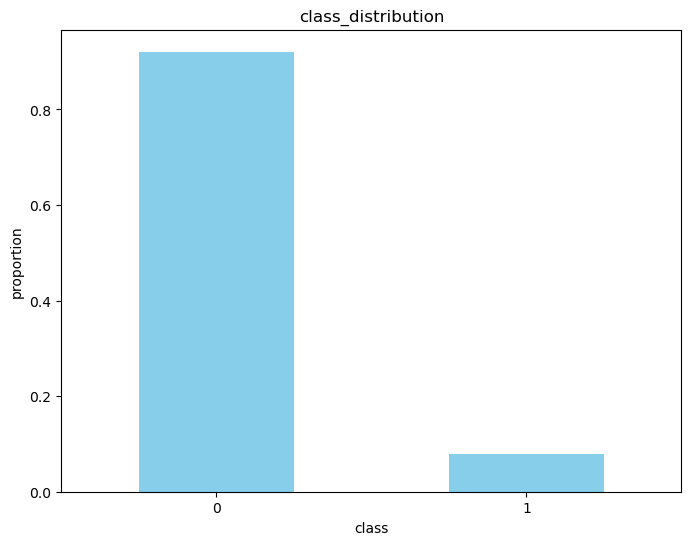

In [201]:
# Create the target_distribution (normalized count of each class)
target_distribution = data['fraud'].value_counts(normalize=True)
plt.figure(figsize=(8,6))
target_distribution.plot(kind='bar', color='skyblue')
plt.title('class_distribution')
plt.xlabel('class')
plt.ylabel('proportion')
plt.xticks(rotation=0)
plt.show()

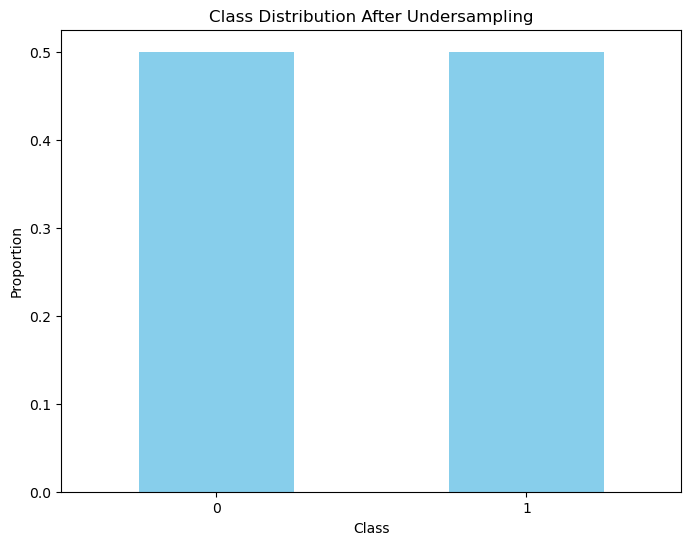

In [202]:
target_distribution = pd.Series(y_train_resampled).value_counts(normalize=True)

plt.figure(figsize=(8,6))
target_distribution.plot(kind='bar', color='skyblue')
plt.title('Class Distribution After Undersampling')
plt.xlabel('Class')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
plt.show()

In [203]:
#splitting dataset into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train_resampled, y_train_resampled, test_size = 0.2, random_state = 1)

In [204]:
print(X_train)

[[2.89448455e+02 9.88204213e+00 1.83258670e+00 1.00000000e+00
  0.00000000e+00 0.00000000e+00 1.00000000e+00]
 [3.75682955e-01 3.42759085e+00 2.48370056e+00 0.00000000e+00
  1.00000000e+00 0.00000000e+00 0.00000000e+00]
 [2.51802780e+01 1.79090734e+00 4.59573620e+00 1.00000000e+00
  0.00000000e+00 0.00000000e+00 1.00000000e+00]
 [2.11261162e+01 2.71987396e-01 6.08177072e+00 1.00000000e+00
  0.00000000e+00 0.00000000e+00 1.00000000e+00]
 [3.05928910e+01 3.54542795e-01 1.32718425e+00 1.00000000e+00
  1.00000000e+00 0.00000000e+00 0.00000000e+00]
 [6.01522919e+02 2.87232060e-02 8.59778630e-01 1.00000000e+00
  0.00000000e+00 0.00000000e+00 1.00000000e+00]
 [5.95487961e+01 3.97277780e-02 8.60030150e-02 1.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.08161780e+01 2.39487123e+01 4.08065743e+00 1.00000000e+00
  0.00000000e+00 0.00000000e+00 1.00000000e+00]
 [8.00687696e+00 7.19093510e-02 1.74359220e+00 1.00000000e+00
  0.00000000e+00 0.00000000e+00 1.00000000e+00]
 [3.922179

In [205]:
print(X_test)

[[8.47759459e-01 3.31403139e+00 4.75497212e-01 0.00000000e+00
  1.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.12087156e+02 2.98012571e-01 2.33928724e+00 1.00000000e+00
  0.00000000e+00 0.00000000e+00 1.00000000e+00]
 [5.52551915e+01 1.74362368e-01 3.16424483e+00 1.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.56949855e+01 1.75989182e+02 8.55622829e-01 1.00000000e+00
  0.00000000e+00 0.00000000e+00 1.00000000e+00]
 [1.16723104e+01 2.23903740e-01 7.44347610e+00 1.00000000e+00
  1.00000000e+00 0.00000000e+00 1.00000000e+00]
 [9.28551200e+00 1.10922937e+01 3.64758985e+00 1.00000000e+00
  0.00000000e+00 0.00000000e+00 1.00000000e+00]
 [1.02254377e+01 4.86101803e-01 4.82909578e-01 1.00000000e+00
  0.00000000e+00 0.00000000e+00 1.00000000e+00]
 [5.86898970e+01 8.93694754e+00 1.04451173e+00 1.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [6.86795187e+01 2.49436470e-01 6.96879892e-01 1.00000000e+00
  1.00000000e+00 0.00000000e+00 1.00000000e+00]
 [        

In [206]:
print(y_train)

[1 0 1 1 0 1 0 1 0 1 1 0 0 1 0 0 1 1 0 0 1 0 1 0 0 1 0 0 0 0 0 1 1 1 1 1 0
 1 0 0 1 0 0 1 1 0 0 0 1 1 1 1 0 0 0 1 0 1 1 1 0 0 0 0 1 1 1 1 1 1 1 1 0 0
 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 1 0 1 1 1 0 1 0 0 1 0 0 0 0 0 0 1 1 1 0 0
 1 1 1 0 0 1 0 1 1 1 1 1 0 1 0]


In [207]:
print(y_test)

[0 1 0 1 1 0 0 0 0 1 1 1 1 1 0 1 0 0 0 1 0 0 1 0 1 0 0 0 1 1 1 1]


In [208]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [209]:
print(X_train)

[[ 1.75724889e+00  3.55132539e-01 -3.98385085e-01  2.94883912e-01
  -6.11249846e-01 -2.77350098e-01  5.34522484e-01]
 [-4.39108929e-01 -1.08626903e-01 -2.17646486e-01 -3.39116499e+00
   1.63599223e+00 -2.77350098e-01 -1.87082869e+00]
 [-2.50645083e-01 -2.26224419e-01  3.68620196e-01  2.94883912e-01
  -6.11249846e-01 -2.77350098e-01  5.34522484e-01]
 [-2.81448365e-01 -3.35360492e-01  7.81119167e-01  2.94883912e-01
  -6.11249846e-01 -2.77350098e-01  5.34522484e-01]
 [-2.09520370e-01 -3.29428795e-01 -5.38676572e-01  2.94883912e-01
   1.63599223e+00 -2.77350098e-01 -1.87082869e+00]
 [ 4.12837221e+00 -3.52839292e-01 -6.68420756e-01  2.94883912e-01
  -6.11249846e-01 -2.77350098e-01  5.34522484e-01]
 [ 1.04848844e-02 -3.52048601e-01 -8.83208260e-01  2.94883912e-01
  -6.11249846e-01 -2.77350098e-01 -1.87082869e+00]
 [-3.59782665e-01  1.36583830e+00  2.25642722e-01  2.94883912e-01
  -6.11249846e-01 -2.77350098e-01  5.34522484e-01]
 [-3.81127568e-01 -3.49736320e-01 -4.23088508e-01  2.94883912e-0

In [210]:
print(X_test)

[[-4.35522119e-01 -1.16786276e-01 -7.75091017e-01 -3.39116499e+00
   1.63599223e+00 -2.77350098e-01 -1.87082869e+00]
 [ 4.09668234e-01 -3.33490554e-01 -2.57733271e-01  2.94883912e-01
  -6.11249846e-01 -2.77350098e-01  5.34522484e-01]
 [-2.21376693e-02 -3.42374957e-01 -2.87384846e-02  2.94883912e-01
  -6.11249846e-01 -2.77350098e-01 -1.87082869e+00]
 [-3.22713774e-01  1.22901137e+01 -6.69574339e-01  2.94883912e-01
  -6.11249846e-01 -2.77350098e-01  5.34522484e-01]
 [-3.53277822e-01 -3.38815355e-01  1.15910639e+00  2.94883912e-01
   1.63599223e+00 -2.77350098e-01  5.34522484e-01]
 [-3.71412575e-01  4.42090450e-01  1.05430218e-01  2.94883912e-01
  -6.11249846e-01 -2.77350098e-01  5.34522484e-01]
 [-3.64271075e-01 -3.19976135e-01 -7.73033465e-01  2.94883912e-01
  -6.11249846e-01 -2.77350098e-01  5.34522484e-01]
 [ 3.95902037e-03  2.87226451e-01 -6.17141858e-01  2.94883912e-01
  -6.11249846e-01 -2.77350098e-01 -1.87082869e+00]
 [ 7.98595749e-02 -3.36980800e-01 -7.13638792e-01  2.94883912e-0

<Axes: >

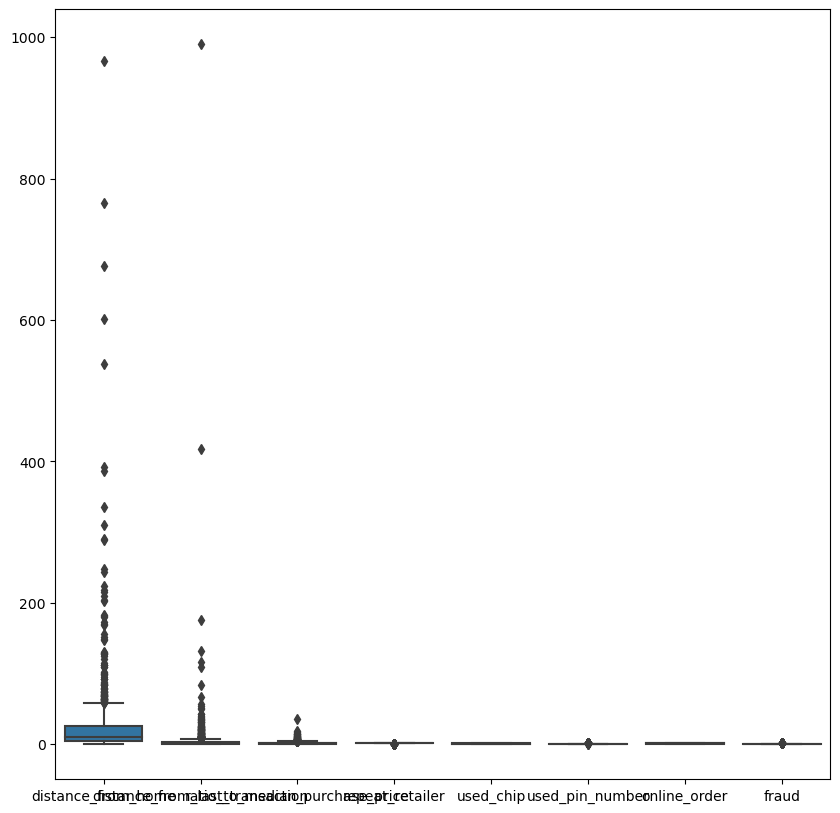

In [211]:
import seaborn as sns
plt.figure(figsize=(10, 10))
sns.boxplot(data = data)

In [212]:
#correlations
correlation_df = data[["ratio_to_median_purchase_price", "fraud"]] 
correlation = correlation_df["ratio_to_median_purchase_price"].corr(correlation_df["fraud"])
print(f"Correlation between transaction amount and fraud:{correlation}")
avgnonfraudtransaction = correlation_df[correlation_df["fraud"]==0]["ratio_to_median_purchase_price"].mean()
avgfraudtransaction = correlation_df[correlation_df["fraud"]==1]["ratio_to_median_purchase_price"].mean()
print(f"Average ratio to median purchase for non frudelent transaction: {avgnonfraudtransaction}")
print(f"Average ratio to median purchase for frudelent transaction: {avgfraudtransaction}")

Correlation between transaction amount and fraud:0.42816159229116163
Average ratio to median purchase for non frudelent transaction: 1.3547485781463178
Average ratio to median purchase for frudelent transaction: 5.075709990480033


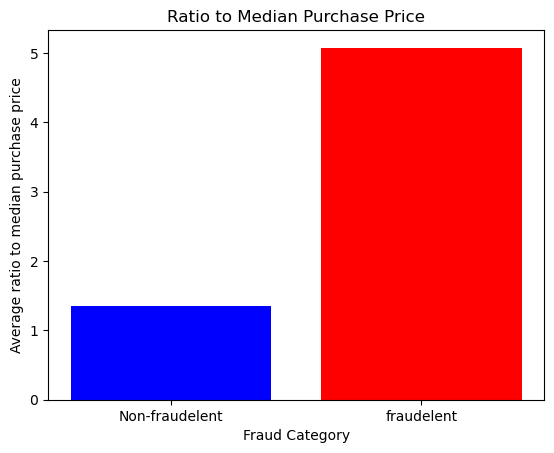

In [213]:
categories = ["Non-fraudelent", "fraudelent"]
average_ratio = [avgnonfraudtransaction, avgfraudtransaction]
plt.bar(categories, average_ratio, color=['blue', 'red'])
plt.title("Ratio to Median Purchase Price")
plt.xlabel("Fraud Category")
plt.ylabel("Average ratio to median purchase price")
plt.show()

In [214]:
from sklearn.impute import SimpleImputer

# Replace NaN values with the mean of each column
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)

# Apply the imputer to X_test
X_test = imputer.transform(X_test)

In [215]:
# #svm
# from sklearn.svm import SVC
# classifier = SVC(kernel = 'linear', random_state = 0)
# classifier.fit(X_train, y_train)
# print(classifier.predict(sc.transform([[9.159,5.6,6.3,1,0,0,1]])))

In [216]:
# y_pred = classifier.predict(X_test)
# print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

In [217]:
# from sklearn.metrics import confusion_matrix, accuracy_score
# cm = confusion_matrix(y_test, y_pred)
# print(cm)
# accuracy_score(y_test, y_pred)

In [218]:
# #logistic regression
# classifier = LogisticRegression(random_state = 0) #classifier is object
# classifier.fit(X_train, y_train)  #fit-method applied on training set

In [219]:
# print(classifier.predict(sc.transform([[2.139,56.3,6.3,0,0,0,0]])))

In [220]:
# y_pred = classifier.predict(X_test)
# print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

In [221]:
# from sklearn.metrics import confusion_matrix, accuracy_score #confusion matrix gives correct and incorrect predictions in the model
# cm = confusion_matrix(y_test, y_pred)  #cm confusion matrix object/variable
# print(cm)
# accuracy_score(y_test, y_pred)

In [222]:
# from sklearn.neighbors import KNeighborsClassifier
# classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
# classifier.fit(X_train, y_train)

In [223]:
# print(classifier.predict(sc.transform([[2.139,56.3,6.3,0,0,0,0]])))

In [224]:
# y_pred = classifier.predict(X_test)
# print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

In [225]:
# from sklearn.metrics import confusion_matrix, accuracy_score
# cm = confusion_matrix(y_test, y_pred)
# print(cm)
# accuracy_score(y_test, y_pred)

In [226]:
#random forest
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [233]:
# 4. Save the trained model
import joblib

# Save both model and scaler

joblib.dump(sc, 'scaler.pkl')

['scaler.pkl']

In [234]:
joblib.dump(classifier, 'fraud_model.pkl')

['fraud_model.pkl']

In [228]:
print(classifier.predict(sc.transform([[2.998417889,0.193680537,0.743415821,1,1,0,1]])))

[0]


In [229]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [1 1]]


In [230]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[15  1]
 [ 3 13]]


0.875

In [231]:
#creating a pandas dataframe after undersampling
df_resampled = pd.DataFrame(X_train_resampled, y_train_resampled)

# Add the target column
df_resampled['target'] = y_train_resampled

print(df_resampled.head())
print(f"Number of rows after undersampling: {len(df_resampled)}")
num_rows = len(df_resampled)  # or df.shape[0]

print(f"Number of rows in the undersampled dataset: {num_rows}")

           0         1         2    3    4    5    6  target
0  12.131853  1.074914  0.410582  1.0  1.0  0.0  0.0       0
0   6.430640  0.363905  1.159077  1.0  0.0  0.0  1.0       0
0  14.668287  1.333309  0.571695  1.0  1.0  0.0  1.0       0
0   5.576975  0.163078  1.716449  1.0  1.0  0.0  1.0       0
0   4.974668  0.500178  0.504898  1.0  0.0  0.0  1.0       0
Number of rows after undersampling: 158
Number of rows in the undersampled dataset: 158


In [232]:
#to run in ui 
#open anaconda prompt 
#type commands mentioned below
#pip install flask
# cd pathaddress
#python app.py
#ek link hoga usse browser mein daal dena